In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.facecolor' : 'white'})

Dataset đã được download về và lưu trữ ở directories data/raw với tên file là daily_weather_data.csv

In [3]:
weather_df = pd.read_csv('data/raw/daily_weather_data.csv')
weather_df

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


In [4]:
num_rows, num_cols = weather_df.shape
print('Số dòng: {}\nSố cột: {}'.format(num_rows, num_cols))

Số dòng: 324647
Số cột: 11


Dữ liệu có tất cả 324647 dòng và 11 cột 

In [5]:
weather_df.columns.tolist()

['date',
 'country',
 'city',
 'Latitude',
 'Longitude',
 'tavg',
 'tmin',
 'tmax',
 'wdir',
 'wspd',
 'pres']

Ý nghĩa của 11 cột dữ liệu:  
* **date**: Ngày mà dữ liệu được ghi lại  
* **country**: Tên quốc gia
* **city**: Tên thành phố  
* **Latitude**: Giá trị vĩ độ của thành phố  
* **Longtitude**: Giá trị kinh độ của thành phố  
* **tavg**: Nhiệt độ trung bình theo đơn vị °C  
* **tmax**: Nhiệt độ cao nhất theo đơn vị °C  
* **tmin**: Nhiệt độ thấp nhất theo đơn vị °C  
* **wdir**: Hướng gió phổ biến tính bằng độ (°)  
* **wspd**: Tốc độ gió trung bình theo km/h  
* **pres**: Áp suất khí quyển trung bình theo đơn vị hPa

In [6]:
weather_df.dtypes

date          object
country       object
city          object
Latitude     float64
Longitude    float64
tavg         float64
tmin         float64
tmax         float64
wdir         float64
wspd         float64
pres         float64
dtype: object

kiểu dữ liệu của từng cột trong dataframe. Trong 11 cột thì có 3 cột là kiểu categorical, các cột còn lại là các cột numeric.

In [7]:
weather_df[['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']].describe().drop(index = ['count', 'std']).round(2)

,tavg,tmin,tmax,wdir,wspd,pres
mean,21.02,17.4,25.04,163.81,13.32,1013.28
min,-33.80,-39.3,-27.30,0.00,0.00,860.20
25%,15.60,11.3,19.80,81.00,8.10,1009.90
50%,25.00,21.3,28.60,142.00,11.60,1012.90
75%,27.50,24.5,31.20,251.00,16.90,1016.80
max,44.10,38.5,89.60,360.00,105.50,1058.00


Bảng thông số thống kê bản của các cột dữ liệu numeric

In [8]:
weather_df[['city', 'country']].describe()

,city,country
count,324647,324647
unique,192,194
top,Kingston,Macau
freq,3490,1745


Bảng thông số thông kê cơ bản của các cột dữ liệu categorical.  
* Có 194 nước và 192 thành phố khác nhau.
* Quốc gia và thành phố có nhiều dòng dữ liệu nhất thuộc về Macau và Kingston, với lần lượt là 3490 và 1745 dòng.

In [15]:
def missing_ratio(s):
  return s.isna().mean()*100

weather_df.agg(missing_ratio).round(3).sort_values(ascending = False)

wdir         12.540
pres         10.852
wspd          6.853
tmax          3.813
tmin          3.808
tavg          2.983
date          0.000
country       0.000
city          0.000
Latitude      0.000
Longitude     0.000
dtype: float64

Tỉ lệ dữ liệu thiếu đối với từng cột dữ liệu với 6 cột bị thiếu dữ liệu, trong đó 3 cột wdir, pres, wspd có tỉ lệ thiếu hơn 5%. 

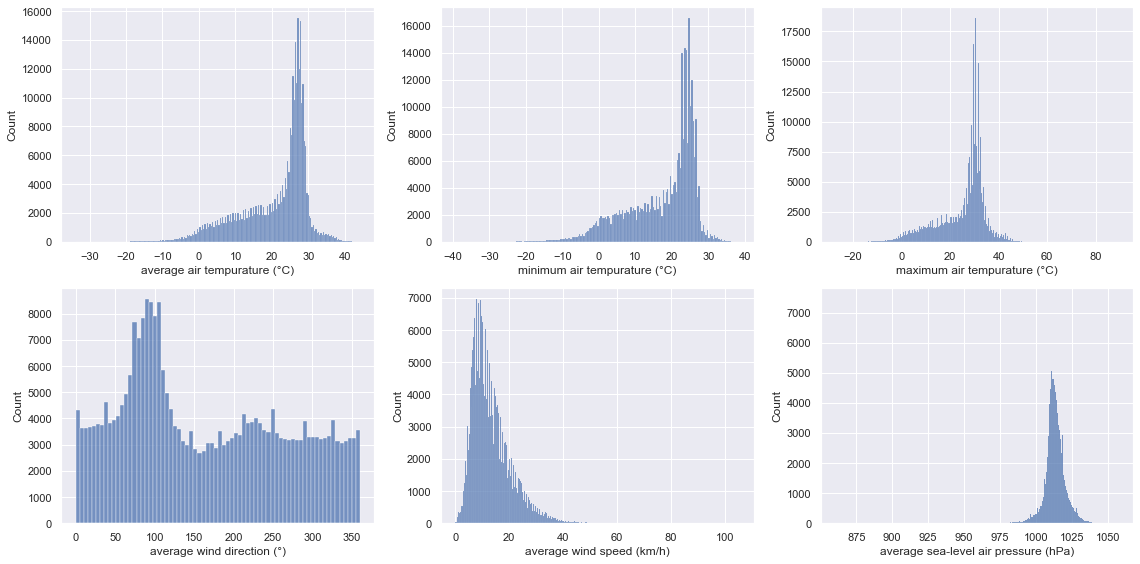

In [31]:
numeric_df = weather_df[['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']]
col_describe = {
  'tavg' : 'average air tempurature (°C)', 'tmin' : 'minimum air tempurature (°C)',
  'tmax' : 'maximum air tempurature (°C)', 'wdir' : 'average wind direction (°)',
  'wspd' : 'average wind speed (km/h)', 'pres' : 'average sea-level air pressure (hPa)'
  }
cols = list(col_describe.keys())
fig, axes = plt.subplots(2,3, figsize = (16,8))
for i,ax in enumerate(axes.flat):
  sns.histplot(data = numeric_df, x = cols[i], ax = ax)
  ax.set_xlabel(col_describe[cols[i]])
fig.tight_layout()